### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**

California adalah negara bagian yang paling banyak penduduknya dan ketiga terluas wilayahnya di Amerika Serikat. Banyaknya penduduk California disebabkan California merupakan salah satu wilayah perputaran perekonomian terbesar dari segi pertanian, entertainment dan wisata. Pada dataset ini membahas tentang harga rumah-rumah yang berada di distrik California.

1. longitude: Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi lebih jauh ke barat

2. latitude: Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi lebih jauh ke utara

3. housingMedianAge: Usia rata-rata sebuah rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru

4. totalRooms: Jumlah total kamar dalam satu blok

5. totalBedrooms: Jumlah total kamar tidur dalam satu blok

6. population: Jumlah total orang yang tinggal dalam satu blok

7. households: Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok

8. medianIncome: Pendapatan rata-rata untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)

9. medianHouseValue: Nilai median rumah untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)

10. oceanProximity: Lokasi rumah dengan laut/laut


**Problem Statement**

Pada survey sensus California, dapat memprediksi menentukan **menentukan harga atau value rumah yang tepat di California** dengan adanya fitur population, total_rooms, and total_bedrooms.



**3. Goals**

Untuk memprediksi nilai median rumah (median house value) di California

**4. Analytics Approach**

Menentukan nilai median rumah dengan pengaruh fitur-fitur ada, melakukan analisis data untuk mengetahui informasi dari data yang ada. Selanjutnya, membangun algoritma untuk menemukan model regresi. Menemukan fitur yang berpengaruh besar terhadap target median model value.

**5. Metric Evaluation**

Evaluasi Metrik yang akan digunakan untuk model regresi yang dibangun adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

In [2]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
house = pd.read_csv('data_california_house.csv')

In [4]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Pada tabel terdapat fitur numerikal dan kategorikal. Fitur numerikal seperti longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value. Sedangkan, fitur kategorikal hanya pada fitur ocean_proximity.

In [6]:
house['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

In [7]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis (EDA)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

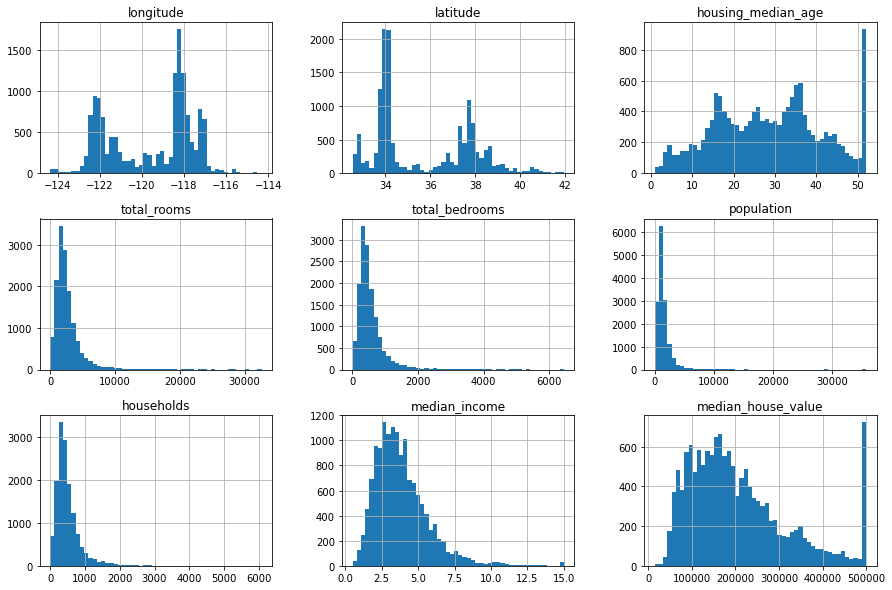

In [8]:
house.hist(bins=50, figsize=(15,10))

Dari histogram di atas, jelas bahwa sebagian besar fitur miring. Tampaknya housing_median_age dan median_housing_value telah dibatasi di akhir (Puncak di akhir).

## Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [9]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in house.columns:
    listItem.append([col, house[col].dtype, house[col].isna().sum(), round((house[col].isna().sum()/len(house[col]))*100, 2),
                    house[col].nunique(), list(house[col].drop_duplicates().sample(2).values)]);

house_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
house_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-116.29, -119.7]"
1,latitude,float64,0,0.00,836,"[33.45, 35.18]"
2,housing_median_age,float64,0,0.00,52,"[40.0, 20.0]"
3,total_rooms,float64,0,0.00,5227,"[3267.0, 3078.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1200.0, 1246.0]"
5,population,float64,0,0.00,3498,"[1713.0, 3011.0]"
6,households,float64,0,0.00,1649,"[925.0, 1689.0]"
7,median_income,float64,0,0.00,9797,"[2.7411, 3.6471]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, NEAR BAY]"
9,median_house_value,float64,0,0.00,3548,"[371200.0, 280400.0]"


Dari input dataset, terdapat data kosong pada beberapa fitur atau kolom.

In [10]:
# Mendeteksi adanya duplikan pada data
house.duplicated().sum()

0

In [125]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14311 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14311 non-null  float64
 1   latitude            14311 non-null  float64
 2   housing_median_age  14311 non-null  float64
 3   total_rooms         14311 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14311 non-null  float64
 6   households          14311 non-null  float64
 7   median_income       14311 non-null  float64
 8   ocean_proximity     14311 non-null  object 
 9   median_house_value  14311 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


## Missing Value

In [12]:
# Cek nilai missing value
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terlihat terdapat missing value pada kolom total_bedrooms sebanyak 137 dari total data 

In [13]:
# Menghapus data null pada kolom total_bedrooms
house.dropna(inplace = True)

In [14]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [15]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in house.columns if ((house[feature].dtypes != 'object'))]
house[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Drop Columns

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolam dan fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
**Tidak ada yang didrop**

### Cek Deskriptif Statistik Fitur Numerikal

In [17]:
num_features = [feature for feature in house.columns if ((house[feature].dtypes != 'object'))]
house[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Pengecualian untuk 'fitur longitude', ada fitur yang memiliki nilai negatif (<0) 

### Data Correlation

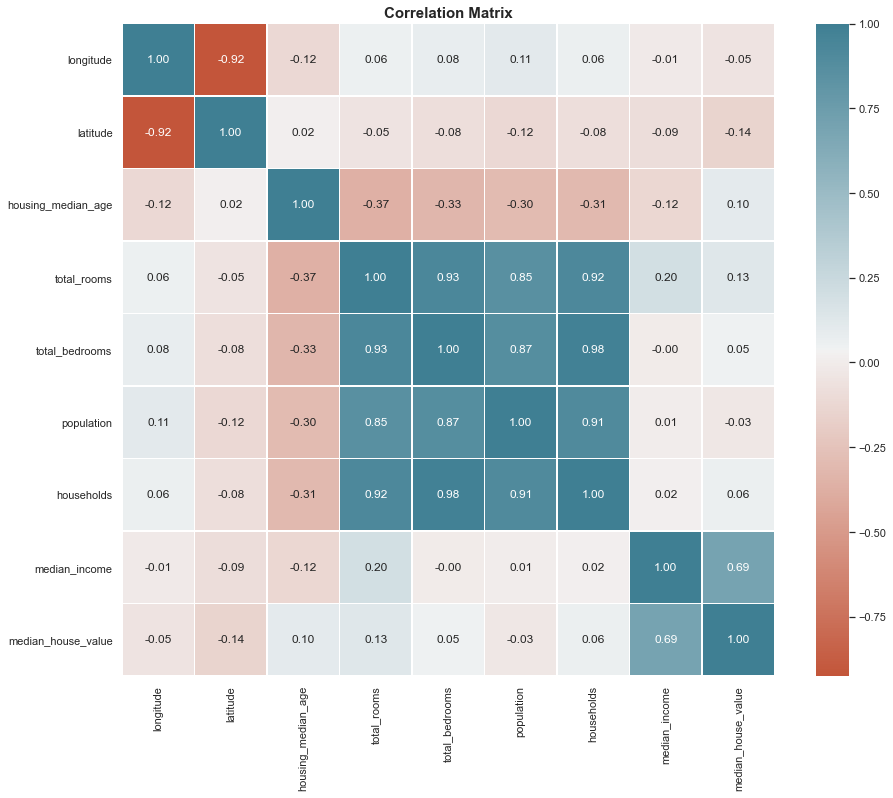

In [65]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = house.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

<AxesSubplot:>

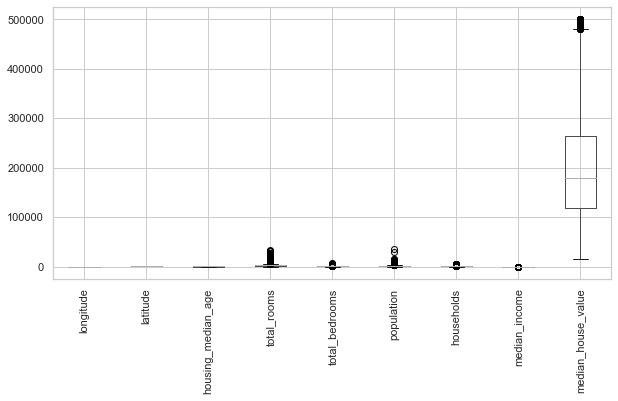

In [66]:
plt.figure(figsize=(10, 5))
house.boxplot(rot=90)

In [67]:
numerical = house.select_dtypes(exclude='object').columns
numerical

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

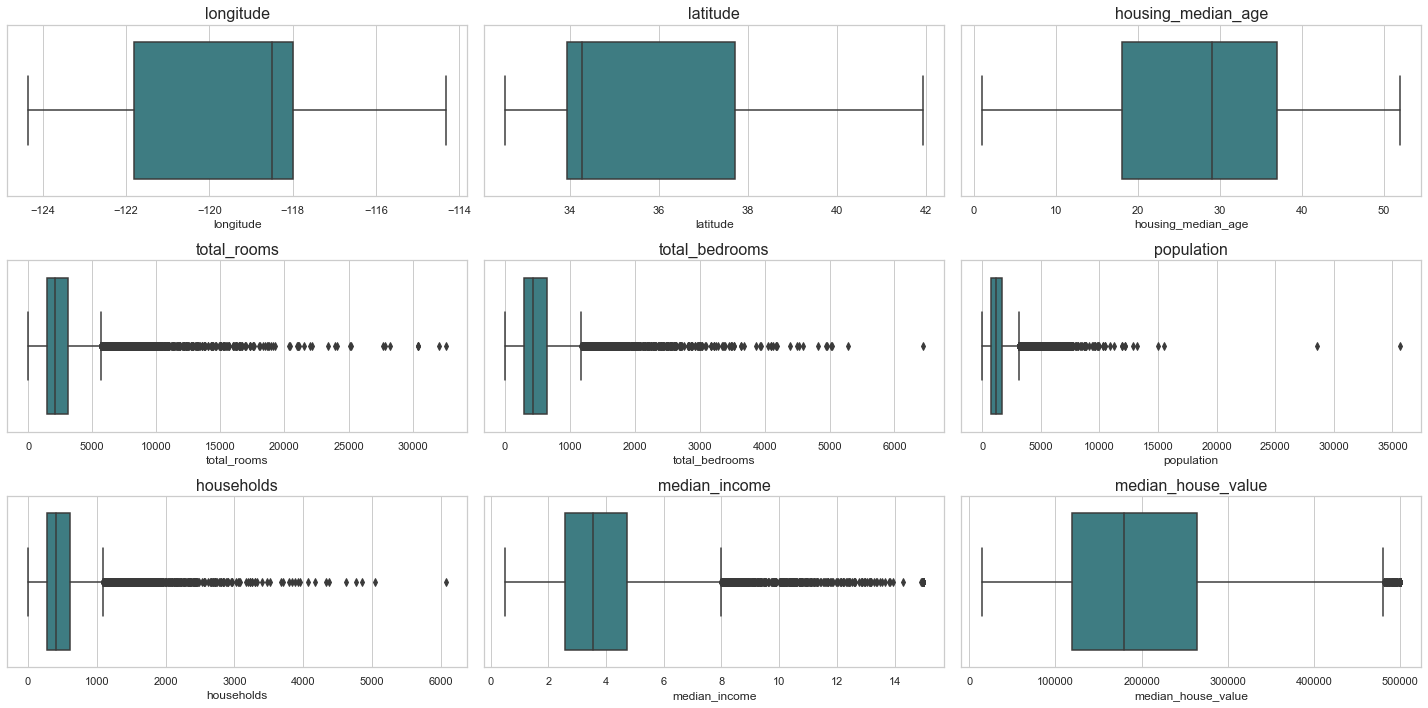

In [68]:
plt.figure(figsize=(20, 10), facecolor='white')
sns.set(style='whitegrid')
plotnumber = 1

for num in numerical:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=num, data=house, palette='crest')
    plt.title(num, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


Terlihat banyak sekali outliers pada fitur households, median_income, median_house_value, total_rooms, total_bedrooms dan population.

In [69]:
#Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [70]:
# Outliers pada fitur total rooms 
find_anomalies(house['total_rooms'])

IQR: 1690.0
limit_bawah: -1083.0
limit_atas: 5677.0


In [71]:
# Outliers pada fitur total bedrooms
find_anomalies(house['total_bedrooms'])

IQR: 352.0
limit_bawah: -233.0
limit_atas: 1175.0


In [72]:
# Outliers pada fitur population
find_anomalies(house['population'])

IQR: 938.0
limit_bawah: -623.0
limit_atas: 3129.0


In [73]:
# Outliers pada fitur households
find_anomalies(house['households'])

IQR: 324.5
limit_bawah: -207.75
limit_atas: 1090.25


In [74]:
# Outliers pada fitur median income
find_anomalies(house['median_income'])

IQR: 2.1667000000000005
limit_bawah: -0.6806500000000009
limit_atas: 7.986150000000001


In [75]:
# Outliers pada fitur median house value
find_anomalies(house['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


### Feature Engineering

#### Total Rooms

In [76]:
# Cek deskriptif statistik 
house['total_rooms'].describe()

count    14311.000000
mean      2640.917686
std       2197.192896
min          2.000000
25%       1452.000000
50%       2125.000000
75%       3142.000000
max      32627.000000
Name: total_rooms, dtype: float64

In [77]:
# Cek Outlier
house[house['total_rooms'] > 5677.0].count()['total_rooms']

905

####  Total Bedrooms

In [78]:
# Cek deskriptif statistik 
house['total_bedrooms'].describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [79]:
house[house['total_bedrooms'] > 1175.0].count()['total_bedrooms']

879

####  Population

In [80]:
# Cek deskriptif statistik 
house['population'].describe()

count    14311.000000
mean      1424.772273
std       1151.795857
min          3.000000
25%        784.000000
50%       1164.000000
75%       1722.000000
max      35682.000000
Name: population, dtype: float64

In [81]:
house[house['population'] > 3129.0].count()['population']

822

#### Households

In [82]:
# Cek deskriptif statistik 
house['households'].describe()

count    14311.000000
mean       499.480470
std        383.826005
min          1.000000
25%        279.000000
50%        410.000000
75%        603.500000
max       6082.000000
Name: households, dtype: float64

In [83]:
house[house['households'] > 1090.25].count()['households']

836

#### Median Income

In [84]:
# Cek deskriptif statistik 
house['median_income'].describe()

count    14311.000000
mean         3.866774
std          1.890866
min          0.499900
25%          2.569400
50%          3.540300
75%          4.736100
max         15.000100
Name: median_income, dtype: float64

In [85]:
house[house['median_income'] > 7.986150000000001].count()['median_income']

477

#### Median House Value

In [86]:
# Cek deskriptif statistik 
house['median_house_value'].describe()

count     14311.000000
mean     206793.156942
std      115404.371629
min       14999.000000
25%      119400.000000
50%      180000.000000
75%      263750.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [87]:
house[house['median_house_value'] > 480275.0].count()['median_house_value']

751

### Drop Data

In [88]:
# Copy Dataset
house_drop = house.copy()

In [89]:
# Drop data outlier pada 'total_rooms'
house_drop = house_drop[house_drop['total_rooms'] <= 5677.0]

In [90]:
# Drop data outlier pada 'total_bedrooms'
house_drop = house_drop[house_drop['total_bedrooms'] <= 1175.0]

In [91]:
# Drop data outlier pada 'population'
house_drop = house_drop[house_drop['population'] <= 3129.0]

In [92]:
# Drop data outlier pada 'households'
house_drop = house_drop[house_drop['households'] <= 1090.25]

In [93]:
# Drop data outlier pada 'median_income'
house_drop = house_drop[house_drop['median_income'] <= 7.986150000000001]

In [94]:
# Drop data outlier pada 'median_house_value'
house_drop = house_drop[house_drop['median_house_value'] <= 480275.0]

### Clean Dataset

In [95]:
# Cek dataset yang sudah bersih
house_drop.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0


In [96]:
house_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12231 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           12231 non-null  float64
 1   latitude            12231 non-null  float64
 2   housing_median_age  12231 non-null  float64
 3   total_rooms         12231 non-null  float64
 4   total_bedrooms      12231 non-null  float64
 5   population          12231 non-null  float64
 6   households          12231 non-null  float64
 7   median_income       12231 non-null  float64
 8   ocean_proximity     12231 non-null  object 
 9   median_house_value  12231 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.0+ MB


In [97]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000,14311.000000
mean,-119.567150,35.631365,28.609671,2640.917686,538.260709,1424.772273,499.480470,3.866774,206793.156942
std,2.006374,2.139589,12.606493,2197.192896,423.577544,1151.795857,383.826005,1.890866,115404.371629
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1452.000000,295.000000,784.000000,279.000000,2.569400,119400.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1164.000000,410.000000,3.540300,180000.000000
75%,-118.000000,37.715000,37.000000,3142.000000,647.000000,1722.000000,603.500000,4.736100,263750.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [98]:
house_drop.describe(include='object')

,ocean_proximity
count,12231
unique,5
top,<1H OCEAN
freq,5260


### Modelling

In [99]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [100]:
house_drop.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231.000000,12231,12231.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5260,NaN
mean,-119.606490,35.701858,29.472079,2146.598234,445.808601,1196.173330,416.966315,3.570443,NaN,186963.199820
std,2.005061,2.169588,12.200191,1093.187558,221.935394,602.793248,205.712122,1.439360,NaN,93647.499731
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,NaN,14999.000000
25%,-121.790000,33.940000,19.000000,1377.000000,285.000000,767.000000,270.000000,2.492550,NaN,113300.000000
50%,-118.610000,34.360000,30.000000,1980.000000,412.000000,1111.000000,388.000000,3.392200,NaN,170500.000000
75%,-118.020000,37.740000,38.000000,2785.000000,580.000000,1559.000000,542.000000,4.473200,NaN,241300.000000


In [101]:
for i in ['ocean_proximity']:
    print(house_drop[i].value_counts())

<1H OCEAN     5260
INLAND        4083
NEAR OCEAN    1545
NEAR BAY      1341
ISLAND           2
Name: ocean_proximity, dtype: int64


#### Encoding

In [102]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['ocean_proximity']),
], remainder='passthrough')

#### Data Splitting

In [103]:
# Memisahkan data independen variabel dengan target
X = house_drop.drop(['median_house_value'], axis=1)
y = house_drop['median_house_value']

#### Train and Test Splitting

In [104]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [105]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-58040.94361877 -59185.12948476 -58124.66933232 -57869.89088187
 -60457.22262738] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-41253.02768781 -42327.87044974 -41508.22169853 -40480.6435269
 -42310.16801484] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.24656928 -0.2495713  -0.23514187 -0.2296707  -0.24856942] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-54752.22088137 -56787.02822234 -55284.0571632  -53907.81257211
 -58822.51385786] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-37514.28240655 -38689.53132471 -38826.31984624 -36978.48004948
 -40014.85014337] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
 

In [107]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-58735.571189,976.862045,-41575.986276,694.697439,-0.241905,0.008005
1,KNN Regressor,-55910.726539,1731.642241,-38404.692754,1065.684991,-0.218865,0.008597
2,DecisionTree Regressor,-65574.359156,1234.417665,-44029.318043,888.230411,-0.256046,0.008246
3,RandomForest Regressor,-46980.210237,1370.038302,-31056.465968,625.275077,-0.177291,0.007322
4,XGBoost Regressor,-44921.693724,1440.490067,-29956.131273,820.318508,-0.172131,0.007073


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [108]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44028.969524,30095.865759,0.186148
RandomForest,45057.257030,30973.602019,0.191443


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.
Hyperparameter Tuning

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke Tuning XGBoost.

In [109]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [110]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [111]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [113]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=No

In [114]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,4.417521,0.111860,0.018237,0.005999,0.9,0.059948,119,8,0.05,5,...,829.111123,1,-0.181568,-0.185041,-0.174398,-0.168112,-0.187317,-0.179287,0.007093,1
17,4.481504,0.081913,0.016829,0.001287,0.6,0.001,190,5,0.04,9,...,1047.916602,3,-0.196552,-0.202820,-0.192141,-0.182532,-0.205464,-0.195902,0.008156,2
20,1.885153,0.271820,0.016007,0.004092,0.9,0.007743,143,4,0.38,6,...,935.727045,2,-0.195048,-0.210052,-0.195092,-0.184287,-0.205950,-0.198086,0.009095,3
3,3.516737,0.183875,0.018336,0.002335,0.5,0.021544,166,8,0.1,9,...,1188.405379,4,-0.198532,-0.215027,-0.202459,-0.192295,-0.211617,-0.203986,0.008353,5
8,4.121681,0.105689,0.015986,0.002933,0.7,0.021544,182,6,0.31,2,...,867.808429,5,-0.204206,-0.208014,-0.203089,-0.189744,-0.204357,-0.201882,0.006291,4


In [115]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43951.87772553768
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


### Predict to Test Set with The Tuned Model

In [116]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42432.941194,28860.963323,0.17512


### Performance Comparison 

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [117]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44028.969524,30095.865759,0.186148


In [118]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42432.941194,28860.963323,0.17512


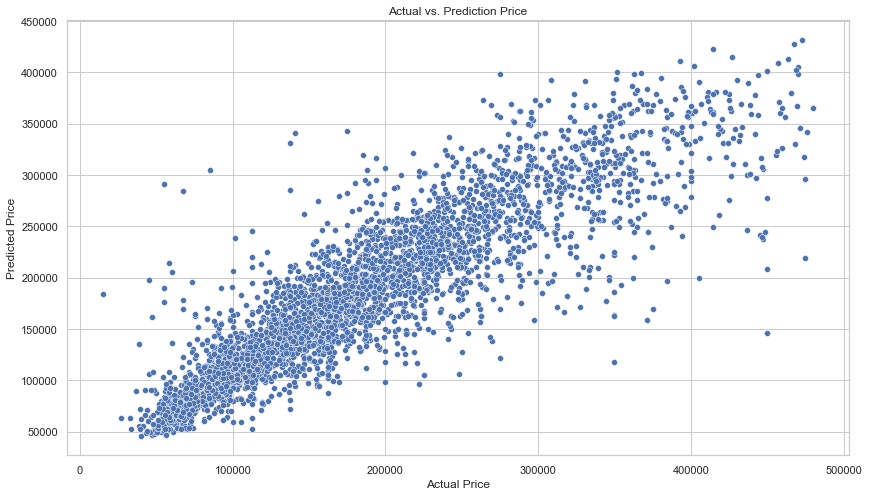

In [119]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

#### Feature Importances
Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances.

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### Conclusion

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar 42432.94, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga rumah di California pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar USD 43 dari harga yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh kurangnya fitur pada dataset yang bisa merepresentasikan aspek rumah lainnya.

### Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('median_housinng_value'), seperti fasilitas lainnya  atau jarak ke pusat kota. Selain itu, adanya penambahan data terkini untuk data survey sensus California tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   

2. Melihat kembali data predict, data mana saja yang memiliki nilai error yang tinggi. dan membandingan feature - feature mana saja yang menyebabkan model menghasilkan error tersebut dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita dapat melakukan trainning ulang dengan penerapan feature enggineering lainnya. 


## Save Model

In [124]:
# Save model
import pickle

# Final Model XGBoost
model = {'XGBoost': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
final_model = random_xgb.best_estimator_

# Fitting model
final_model.fit(X_train, y_train)

# Prdict test set
y2_pred_final_model = final_model.predict(X_test)

# Simpan nilai metrics RMSEE setelah tuning
rmse_final_model =  np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

pickle.dump(final_model, open('Model_California_house_XGB.sav', 'wb'))

